In [1]:
%%shell
## Install following apps
apt install clang-12 llvm-12 python3.7 python3.7-venv verilator graphviz git libffi-dev yosys haskell-stack python3-tk iverilog shunit2

## Clone CGRA-Flow
git clone https://github.com/tancheng/CGRA-Flow

## Install and setup CGRA-Mapper
cd /content/CGRA-Flow && rm -rf CGRA-Mapper && git clone https://github.com/tancheng/CGRA-Mapper
cd /content/CGRA-Flow/CGRA-Mapper/ && mkdir build && cd build && cmake .. && make
ln -sf /usr/bin/opt-12 /usr/bin/opt
cd /content/CGRA-Flow/CGRA-Mapper/ && cp -r test/ a-test/ && cd a-test/ && source compile.sh && ./run.sh
cd /content/CGRA-Flow/CGRA-Mapper/a-test/ && ./dot.sh

## You can view the kernel.png from the left panel by double clicking it


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
git is already the newest version (1:2.34.1-1ubuntu1.9).
python3-tk is already the newest version (3.10.8-1~22.04).
The following additional packages will be installed:
  berkeley-abc binfmt-support gir1.2-atk-1.0 gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-gtk-3.0 gir1.2-harfbuzz-0.0 gir1.2-pango-1.0
  libclang-common-12-dev libclang-cpp12 libclang1-12 libgmp-dev libgmpxx4ldbl
  libllvm12 libpangoxft-1.0-0 libpfm4 libpython3.7-minimal libpython3.7-stdlib
  libsystemc libsystemc-dev libz3-4 libz3-dev llvm-12-dev llvm-12-linker-tools
  llvm-12-runtime llvm-12-tools mailcap mime-support python3-cairo
  python3-gi-cairo python3-numpy python3-pygments python3-yaml
  python3.7-distutils python3.7-lib2to3 python3.7-minimal xdot
Suggested packages:
  clang-12-doc gtkwave gmp-doc libgmp10-doc libmpfr-dev llvm-12-doc
  python-numpy-doc python3-

In [4]:
%%shell

## Setup environment
rm -rf /content/venv
python3.7 -m venv /content/venv
source /content/venv/bin/activate

## Pip requirements
pip install py heel hypothesis pytest matplotlib numpy pillow pyyaml siliconcompiler git+https://github.com/tancheng/pymtl3.git


## VectorCGRA
cd /content/CGRA-Flow/ && rm -rf VectorCGRA && git clone https://github.com/tancheng/VectorCGRA
cd /content/CGRA-Flow/VectorCGRA/ && rm -rf build && mkdir -p build && cd build && pytest ../cgra/test/ -v --tb=short


  Cloning https://github.com/tancheng/pymtl3.git to /tmp/pip-req-build-oug98bd2
  Running command git clone --filter=blob:none --quiet https://github.com/tancheng/pymtl3.git /tmp/pip-req-build-oug98bd2
  Resolved https://github.com/tancheng/pymtl3.git to commit b828540ad25ef87de1a63ce4a32462ef05fcfc22
  Preparing metadata (setup.py) ... done
  Using cached py-1.11.0-py2.py3-none-any.whl (98 kB)
  Using cached heel-1.0.0-py3-none-any.whl
  Using cached hypothesis-6.79.4-py3-none-any.whl (417 kB)
  Using cached pytest-7.4.0-py3-none-any.whl (323 kB)
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached Pillow-9.5.0-cp37-cp37m-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached PyYAML-6.0.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (670 kB)
  Using cached siliconcompiler-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_

In [ ]:
## Tools

## cacti

! cd CGRA-Flow/tools && rm -rf cacti && git clone https://github.com/tancheng/cacti.git
! cd CGRA-Flow/tools/cacti && make

## mflowgen
! cd CGRA-Flow/tools && rm -rf mflowgen && git clone https://github.com/tancheng/mflowgen.git

! cd CGRA-Flow/tools/mflowgen && pip install -e .

## sv2v

! cd CGRA-Flow/tools && rm -rf sv2v && git clone https://github.com/zachjs/sv2v.git
! stack upgrade && cd CGRA-Flow/tools/sv2v && make


## Load Program and Map onto CGRA

In [ ]:
# from VectorCGRA.lib.common                  import *
# from pymtl3.stdlib.test.test_srcs           import TestSrcRTL
# from VectorCGRA.lib.ctrl_helper             import *
# from VectorCGRA.fu.flexible.FlexibleFuRTL   import FlexibleFuRTL
# from VectorCGRA.fu.single.AdderRTL          import AdderRTL
# from VectorCGRA.fu.single.MulRTL            import MulRTL
# from VectorCGRA.fu.single.PhiRTL            import PhiRTL
# from VectorCGRA.fu.single.CompRTL           import CompRTL
# from VectorCGRA.fu.single.BranchRTL         import BranchRTL
# from VectorCGRA.fu.single.MemUnitRTL        import MemUnitRTL
# from VectorCGRA.fu.single.SelRTL            import SelRTL
# from VectorCGRA.fu.single.ShifterRTL        import ShifterRTL
# from VectorCGRA.fu.single.LogicRTL          import LogicRTL
# from VectorCGRA.fu.single.RetRTL            import RetRTL
# from VectorCGRA.fu.double.SeqMulAdderRTL    import SeqMulAdderRTL
# from VectorCGRA.cgra.CGRATemplateRTL        import CGRATemplateRTL

# from pymtl3.passes import TracingConfigs
# from pymtl3.passes.backends.verilog import *
# from pymtl3.passes.backends.verilog import TranslationImportPass

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
## Build folder
! rm -rf CGRA-Flow/build && mkdir -p CGRA-Flow/build/program


In [ ]:
%%writefile CGRA-Flow/build/program/kernel.cpp

#define NTAPS 32

float input[NTAPS];
float output[NTAPS];
float coefficients[NTAPS] = {0.25, 1.50, 3.75, -2.25, 0.50, 0.75, -3.00, 1.25,
0.25, 1.50, 3.75, -2.25, 0.50, 0.75, -3.00, 1.25,
0.25, 1.50, 3.75, -2.25, 0.50, 0.75, -3.00, 1.25,
0.25, 1.50, 3.75, -2.25, 0.50, 0.75, -3.00, 1.25};

void kernel(float input[], float output[], float coefficient[]);

int main()
{

//  input_dsp (input, NTAPS, 0);

  kernel(input, output, coefficients);

//  output_dsp (input, NTAPS, 0);
//  output_dsp (coefficients, NTAPS, 0);
//  output_dsp (output, NTAPS, 0);
  return 0;
}

void kernel(float input[], float output[], float coefficient[])
/*   input :           input sample array */
/*   output:           output sample array */
/*   coefficient:      coefficient array */
{
  int i;
  int j = 0;

//  for(j=0; j< NTAPS; ++j) {
    for (i = 0; i < NTAPS; ++i) {
      output[j] += input[i] * coefficient[i];
    }
//  }
}

Writing CGRA-Flow/build/program/kernel.cpp


In [ ]:
## compile with llvm
!clang-12 -emit-llvm -O3 -fno-unroll-loops -o CGRA-Flow/build/program/kernel.bc -c CGRA-Flow/build/program/kernel.cpp
!llvm-dis-12 CGRA-Flow/build/program/kernel.bc -o CGRA-Flow/build/program/kernel.ll

In [ ]:
## View DFG

# make sure you have the correct location of the mapper in the following line
!opt -load CGRA-Flow/CGRA-Mapper/build/src/libmapperPass.so -mapperPass CGRA-Flow/build/program/kernel.bc
! mv *.dot *.json CGRA-Flow/build/program/

This is inadvisable as it may cause display problems. If
you REALLY want to taste LLVM bitcode first-hand, you
can force output with the `-f' option.

Please provide a valid <param.json> in the current directory.
A set of default parameters is leveraged.
[function 'main' is not in our target list]
Please provide a valid <param.json> in the current directory.
A set of default parameters is leveraged.
[function '_Z6kernelPfS_S_' is one of our targets]
*** reach target loop ID: 0
... done detected loops.size(): 1
*** current function: _Z6kernelPfS_S_
*** current basic block:   %4 = load float, float* %1, align 4, !tbaa !2
   ****** succ bb:   %6 = phi float [ %4, %3 ], [ %13, %5 ]
  %4 = load float, float* %1, align 4, !tbaa !2 *** ignored by pass due to that the BB is out of the scope (target loop)
  br label %5 *** ignored by pass due to that the BB is out of the scope (target loop)
*** current basic block:   %6 = phi float [ %4, %3 ], [ %13, %5 ]
   ****** succ bb:   ret void
   ******

### VecorCGRA Tests

In [ ]:
## extract target kernel
irFile = open('CGRA-Flow/build/program/kernel.ll', 'r')
irLines = irFile.readlines()
targetKernels = []
for line in irLines:
    if "define " in line and "{" in line and "@" in line:
        funcName = line.split("@")[1].split("(")[0]
        if "main" not in funcName:
            targetKernels.append(funcName)

irFile.close()
print(targetKernels)

['_Z6kernelPfS_S_']


In [ ]:
targetKernel = '_Z6kernelPfS_S_'

In [ ]:
## path fix

import sys
sys.path.append('/content/CGRA-Flow')

# import libraries
from pymtl3 import *
from pymtl3.stdlib.test             import TestSinkCL
from pymtl3.stdlib.test.test_srcs   import TestSrcRTL

from VectorCGRA.lib.opt_type                import *
from VectorCGRA.lib.messages                import *
from VectorCGRA.lib.common                  import *

from VectorCGRA.fu.flexible.FlexibleFuRTL   import FlexibleFuRTL
from VectorCGRA.fu.single.AdderRTL          import AdderRTL
from VectorCGRA.fu.single.MemUnitRTL        import MemUnitRTL
from VectorCGRA.fu.single.MulRTL            import MulRTL
from VectorCGRA.fu.single.SelRTL            import SelRTL
from VectorCGRA.fu.single.ShifterRTL        import ShifterRTL
from VectorCGRA.fu.single.LogicRTL          import LogicRTL
from VectorCGRA.fu.single.PhiRTL            import PhiRTL
from VectorCGRA.fu.single.CompRTL           import CompRTL
from VectorCGRA.fu.single.BranchRTL         import BranchRTL
from VectorCGRA.fu.single.RetRTL            import RetRTL
from VectorCGRA.fu.double.SeqMulAdderRTL    import SeqMulAdderRTL
from VectorCGRA.cgra.CGRATemplateRTL        import CGRATemplateRTL

from pymtl3.passes import TracingConfigs
from pymtl3.passes.backends.verilog import *
from pymtl3.passes.backends.verilog import TranslationImportPass

In [ ]:
%%shell

## create a folder for results

DIR="CGRA-Flow/build/results"

# Check if the directory exists
if [ -d "$DIR" ]; then
    # If it exists, remove all its contents
    rm -rf ${DIR}/*
else
    # If it doesn't exist, create it
    mkdir ${DIR}
fi

In [ ]:
! pytest CGRA-Flow/VectorCGRA/

In [ ]:
## CGRA definition

fuType2RTL = {}
fuType2RTL["Phi"  ] = PhiRTL
fuType2RTL["Add"  ] = AdderRTL
fuType2RTL["Shift"] = ShifterRTL
fuType2RTL["Ld"   ] = MemUnitRTL
fuType2RTL["St"   ] = MemUnitRTL
fuType2RTL["Sel"  ] = SelRTL
fuType2RTL["Cmp"  ] = CompRTL
fuType2RTL["MAC"  ] = SeqMulAdderRTL
fuType2RTL["Ret"  ] = RetRTL
fuType2RTL["Mul"  ] = MulRTL
fuType2RTL["Logic"] = LogicRTL
fuType2RTL["Br"   ] = BranchRTL

width             = 2
height            = 2
num_tile_inports  = 4
num_tile_outports = 4
num_xbar_inports  = 8
num_xbar_outports = 8
ctrl_mem_size     = 8
data_mem_size     = 8
RouteType         = mk_bits( clog2( num_xbar_inports + 1 ) )
AddrType          = mk_bits( clog2( ctrl_mem_size ) )
num_tiles         = width * height
num_fu_in         = 4
FunctionUnit      = FlexibleFuRTL
FuList           = [ PhiRTL, AdderRTL, ShifterRTL, MemUnitRTL, SelRTL, CompRTL, SeqMulAdderRTL, RetRTL, MulRTL, LogicRTL, BranchRTL ]
DataType          = mk_data( 32, 1 )
PredicateType     = mk_predicate( 1, 1 )
CtrlType          = mk_ctrl( num_fu_in, num_xbar_inports, num_xbar_outports )
FuInType          = mk_bits( clog2( num_fu_in + 1 ) )
pickRegister      = [ FuInType( x+1 ) for x in range( num_fu_in ) ]

DUT = CGRATemplateRTL

arch = {
  "kernel"                : targetKernel,
  "targetFunction"        : False,
  "targetNested"          : False,
  "targetLoopsID"         : [0],
  "doCGRAMapping"         : True,
  "row"                   : height,
  "column"                : width,
  "precisionAware"        : False,
  "heterogeneity"         : False,
  "isTrimmedDemo"         : True,
  "heuristicMapping"      : True,
  "parameterizableCGRA"   : False,
  "diagonalVectorization" : False,
  "bypassConstraint"      : 4,
  "isStaticElasticCGRA"   : False,
  "ctrlMemConstraint"     : ctrl_mem_size,
  "regConstraint"         : 8
}

paramCGRAJsonObject = json.dumps(arch, indent=4)
# Writing to param.json
with open('CGRA-Flow/build/program/param.json', "w") as outfile:
    outfile.write(paramCGRAJsonObject)

This is inadvisable as it may cause display problems. If
you REALLY want to taste LLVM bitcode first-hand, you
can force output with the `-f' option.

Please provide a valid <param.json> in the current directory.
A set of default parameters is leveraged.
[function 'main' is not in our target list]
Please provide a valid <param.json> in the current directory.
A set of default parameters is leveraged.
[function '_Z6kernelPfS_S_' is one of our targets]
*** reach target loop ID: 0
... done detected loops.size(): 1
*** current function: _Z6kernelPfS_S_
*** current basic block:   %4 = load float, float* %1, align 4, !tbaa !2
   ****** succ bb:   %6 = phi float [ %4, %3 ], [ %13, %5 ]
  %4 = load float, float* %1, align 4, !tbaa !2 *** ignored by pass due to that the BB is out of the scope (target loop)
  br label %5 *** ignored by pass due to that the BB is out of the scope (target loop)
*** current basic block:   %6 = phi float [ %4, %3 ], [ %13, %5 ]
   ****** succ bb:   ret void
   ******

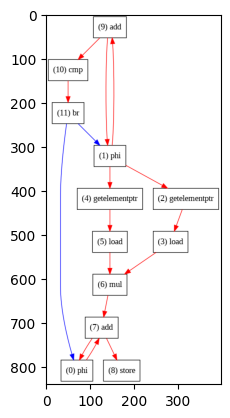

In [ ]:
### View

# !dot -Tpng /content/_Z6kernelPfS_S_.dot -o CGRA-Flow/build/program/kernel.png
!dot -Tpng CGRA-Flow/build/program/*.dot -o CGRA-Flow/build/program/kernel.png
pil_im = Image.open('CGRA-Flow/build/program/kernel.png')
im_array = np.asarray(pil_im)
plt.imshow(im_array)
plt.show()

## Test CGRA and Generate Verilog & Vcd

In [ ]:
target_json = "CGRA-Flow/build/program/config.json"
script_dir  = os.path.abspath("")
file_path   = os.path.join( script_dir,target_json )

In [ ]:
II                = 4 # set the II value from before

In [ ]:
cgra_ctrl         = CGRACtrl( file_path, CtrlType, RouteType, width, height,
                                num_fu_in, num_xbar_inports, num_xbar_outports, II)

AttributeError: ignored

In [ ]:
### Local files

! cd CGRA-Flow && rm -rf flow_test && unzip ../flow_test.zip

In [ ]:
## siliconcompiler

# ! sudo apt install python3.10-venv
# ! python3 -m venv siliconcompiler

# ! source siliconcompiler/bin/activate && pip install siliconcompiler

In [ ]:
## Siliconcompiler test
%%shell
rm -rf silicon-test && mkdir silicon-test && cd silicon-test
wget -c https://raw.githubusercontent.com/siliconcompiler/siliconcompiler/main/examples/heartbeat/heartbeat.v

In [ ]:
! source siliconcompiler/bin/activate && cd silicon-test/ && sc heartbeat.v -target "skywater130_demo" -remote

In [ ]:
! source siliconcompiler/bin/activate && sc-configure https://server.siliconcompiler.com

Overwrite existing remote configuration? y/N: y
Creating remote configuration file for public server: https://server.siliconcompiler.com
Please review the SiliconCompiler cloud beta's terms of service:

https://www.siliconcompiler.com/terms-of-service

In particular, please ensure that you have the right to distribute any IP
which is contained in designs that you upload to the service. This public
service, provided by SiliconCompiler, is not intended to process proprietary IP.
 y/N: y
Remote configuration saved to: /root/.sc/credentials


In [ ]:
%%writefile silicon-test/heartbeat.py

import siliconcompiler

chip = siliconcompiler.Chip('heartbeat')           # create chip object
chip.load_target('skywater130_demo')               # load a pre-defined target
chip.input('heartbeat.v')                          # set input sources
chip.clock('clk', period=10)                       # set constraints
chip.set('option','remote', True)
chip.run()
chip.summary()
chip.show()

In [ ]:
! source siliconcompiler/bin/activate && python silicon-test/heartbeat.py